<a href="https://colab.research.google.com/github/CarolinaPiedrahita/Deep-Learning/blob/main/3_maneras_de_construir_un_modelo_de_aprendizaje_profundo_con_Keras_y_TensorFlow_2_0_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este repo veremos 3 formas en las que podemos crear modelos de aprendizaje profundo usando Keras y TensorFlow 2.0. Implementaremos estos modelos usando el lenguaje de programación Python.

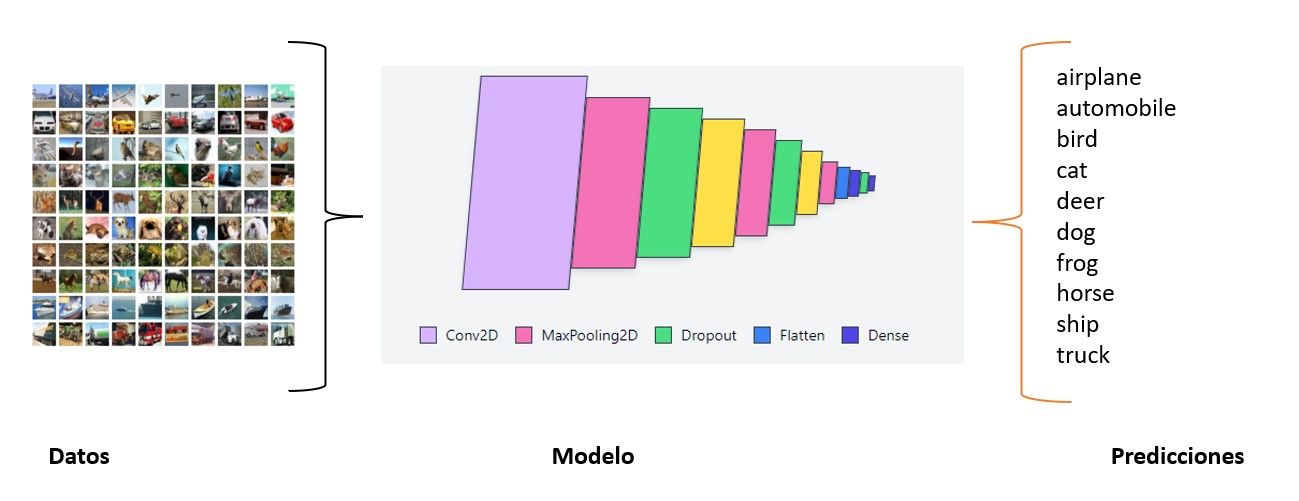

Importando Librerías

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict

Cargando los Datos

In [ ]:
# Cargando los datos del dataset CIFAR-10
(datos_entrenamiento, datos_prueba) = tf.keras.datasets.cifar10.load_data()
imagenes_entrenamiento, clases_entrenamiento = datos_entrenamiento
imagenes_prueba, clases_prueba = datos_prueba

# Definiendo los nombres de las clases en CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_classes = len(class_names)


170498071/170498071 [==============================] - 3s 0us/step


Visualizando algunas Imágenes

<ipython-input-3-a34e66112664>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(clases_entrenamiento[i])


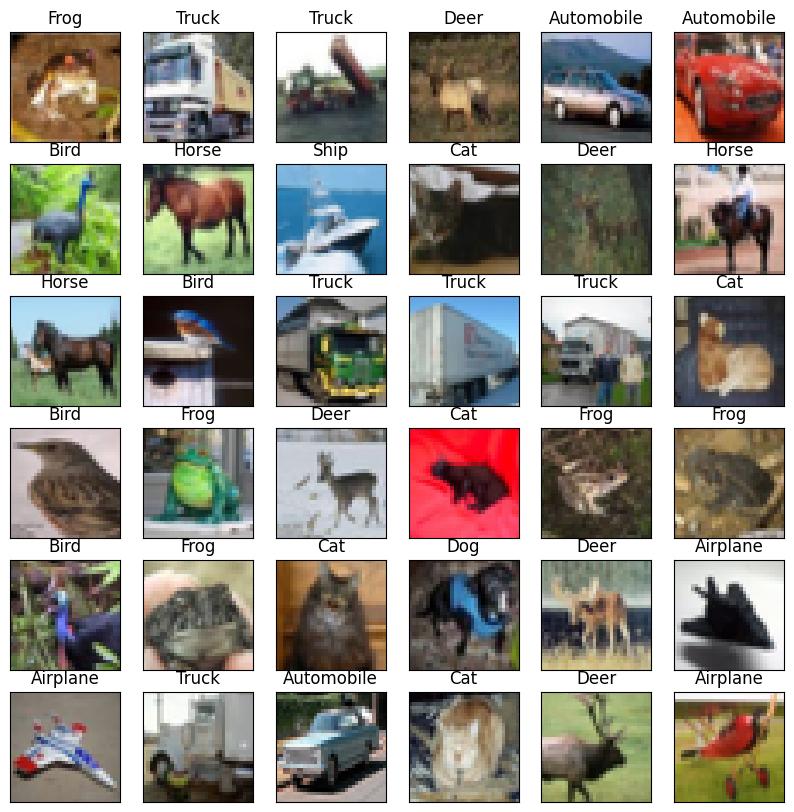

In [ ]:
# Mostrando algunas imágenes del dataset de entrenamiento
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_entrenamiento[i])
    label_index = int(clases_entrenamiento[i])
    plt.title(class_names[label_index])
plt.show()


Normalizando los Datos

In [ ]:
# Normalizando las imágenes a un rango de 0 a 1
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0

# Definiendo la forma de entrada para el modelo
input_shape = [32, 32, 3]


Función de Entrenamiento


In [ ]:
def entrena_modelo(modelo: tf.keras.models.Model) -> Dict:
    modelo.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    history = modelo.fit(
        imagenes_entrenamiento,
        clases_entrenamiento,
        epochs=20,
        batch_size=1024,
        validation_data=(imagenes_prueba, clases_prueba)
    )
    print(modelo.summary())
    return history.history


##3 Formas de Construir un Modelo con Keras y TensorFlow en Python

#**1. Modelo Secuencial**

El modelo secuencial nos permite crear modelos capa por capa, o paso a paso.

In [ ]:
def retorna_modelo_secuencial() -> tf.keras.models.Model:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=(3, 3),
                                     activation='relu',
                                     input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128,
                                    activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(units=num_classes,
                                    activation='softmax'))
    return model

modelo_secuencial = retorna_modelo_secuencial()
historia_secuencial = entrena_modelo(modelo_secuencial)


Epoch 1/20
49/49 [==============================] - 75s 1s/step - loss: 2.1409 - accuracy: 0.1919 - val_loss: 1.8919 - val_accuracy: 0.3167
Epoch 2/20
49/49 [==============================] - 70s 1s/step - loss: 1.8358 - accuracy: 0.3198 - val_loss: 1.7191 - val_accuracy: 0.3816
Epoch 3/20
49/49 [==============================] - 72s 1s/step - loss: 1.6810 - accuracy: 0.3773 - val_loss: 1.5567 - val_accuracy: 0.4413
Epoch 4/20
49/49 [==============================] - 72s 1s/step - loss: 1.5762 - accuracy: 0.4193 - val_loss: 1.4517 - val_accuracy: 0.4834
Epoch 5/20
49/49 [==============================] - 71s 1s/step - loss: 1.4895 - accuracy: 0.4525 - val_loss: 1.3952 - val_accuracy: 0.5042
Epoch 6/20
49/49 [==============================] - 81s 2s/step - loss: 1.4281 - accuracy: 0.4788 - val_loss: 1.3428 - val_accuracy: 0.5304
Epoch 7/20
49/49 [==============================] - 84s 2s/step - loss: 1.3841 - accuracy: 0.5013 - val_loss: 1.2884 - val_accuracy: 0.5522
Epoch 8/20
49/49 [==

#**2. API Funcional**

La API funcional de Keras proporciona una forma más flexible de definir modelos.

In [7]:
def retorna_modelo_funcional() -> tf.keras.models.Model:
    entrada = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(filters=32,
                               kernel_size=(3, 3),
                               activation='relu')(entrada)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(rate=0.25)(x)
    x = tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(rate=0.25)(x)
    x = tf.keras.layers.Conv2D(filters=128,
                               kernel_size=(3, 3),
                               activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(rate=0.4)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=128,
                              activation='relu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    salida = tf.keras.layers.Dense(units=num_classes,
                                   activation='softmax')(x)
    model = tf.keras.models.Model(inputs=entrada,
                                  outputs=salida)
    return model

modelo_funcional = retorna_modelo_funcional()
historia_funcional = entrena_modelo(modelo_funcional)


Epoch 1/20
49/49 [==============================] - 71s 1s/step - loss: 2.1153 - accuracy: 0.2052 - val_loss: 1.8676 - val_accuracy: 0.3236
Epoch 2/20
49/49 [==============================] - 68s 1s/step - loss: 1.7969 - accuracy: 0.3280 - val_loss: 1.6724 - val_accuracy: 0.3980
Epoch 3/20
49/49 [==============================] - 72s 1s/step - loss: 1.6513 - accuracy: 0.3837 - val_loss: 1.5440 - val_accuracy: 0.4392
Epoch 4/20
49/49 [==============================] - 68s 1s/step - loss: 1.5650 - accuracy: 0.4207 - val_loss: 1.4488 - val_accuracy: 0.4785
Epoch 5/20
49/49 [==============================] - 68s 1s/step - loss: 1.4944 - accuracy: 0.4508 - val_loss: 1.3823 - val_accuracy: 0.5116
Epoch 6/20
49/49 [==============================] - 71s 1s/step - loss: 1.4390 - accuracy: 0.4762 - val_loss: 1.3280 - val_accuracy: 0.5316
Epoch 7/20
49/49 [==============================] - 70s 1s/step - loss: 1.3940 - accuracy: 0.4938 - val_loss: 1.2847 - val_accuracy: 0.5456
Epoch 8/20
49/49 [==

#**3. API de Subclases**

La creación de subclases permite una personalización total, pero requiere conocimiento de POO.

In [8]:
class ModeloClase(tf.keras.models.Model):
    def __init__(self) -> None:
        super().__init__()
        self.cnn_1 = tf.keras.layers.Conv2D(filters=32,
                                            kernel_size=(3, 3),
                                            activation='relu',
                                            input_shape=input_shape)
        self.pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.dropout_1 = tf.keras.layers.Dropout(rate=0.25)
        self.cnn_2 = tf.keras.layers.Conv2D(filters=64,
                                            kernel_size=(3, 3),
                                            activation='relu')
        self.pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.dropout_2 = tf.keras.layers.Dropout(rate=0.25)
        self.cnn_3 = tf.keras.layers.Conv2D(filters=128,
                                            kernel_size=(3, 3),
                                            activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.dropout_3 = tf.keras.layers.Dropout(rate=0.4)
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(units=128,
                                           activation='relu')
        self.dropout = tf.keras.layers.Dropout(rate=0.3)
        self.salida = tf.keras.layers.Dense(units=num_classes,
                                            activation='softmax')

    def call(self, inputs: tf.Tensor) -> tf.Tensor:
        x = inputs
        x = self.cnn_1(x)
        x = self.pool_1(x)
        x = self.dropout_1(x)
        x = self.cnn_2(x)
        x = self.pool_2(x)
        x = self.dropout_2(x)
        x = self.cnn_3(x)
        x = self.pool_3(x)
        x = self.dropout_3(x)
        x = self.flatten(x)
        x = self.dense(x)
        x = self.dropout(x)
        x = self.salida(x)
        return x

modelo_clase = ModeloClase()
historia_clase = entrena_modelo(modelo_clase)


Epoch 1/20
49/49 [==============================] - 72s 1s/step - loss: 2.0822 - accuracy: 0.2138 - val_loss: 1.8149 - val_accuracy: 0.3507
Epoch 2/20
49/49 [==============================] - 69s 1s/step - loss: 1.7429 - accuracy: 0.3500 - val_loss: 1.6103 - val_accuracy: 0.4265
Epoch 3/20
49/49 [==============================] - 70s 1s/step - loss: 1.5862 - accuracy: 0.4162 - val_loss: 1.4510 - val_accuracy: 0.4857
Epoch 4/20
49/49 [==============================] - 69s 1s/step - loss: 1.5021 - accuracy: 0.4522 - val_loss: 1.3979 - val_accuracy: 0.5005
Epoch 5/20
49/49 [==============================] - 74s 2s/step - loss: 1.4223 - accuracy: 0.4815 - val_loss: 1.3044 - val_accuracy: 0.5341
Epoch 6/20
49/49 [==============================] - 70s 1s/step - loss: 1.3703 - accuracy: 0.5041 - val_loss: 1.2578 - val_accuracy: 0.5580
Epoch 7/20
49/49 [==============================] - 68s 1s/step - loss: 1.3330 - accuracy: 0.5208 - val_loss: 1.2204 - val_accuracy: 0.5695
Epoch 8/20
49/49 [==

##Comparando los Modelos

Podemos visualizar la pérdida de validación para comparar el rendimiento de los diferentes modelos.

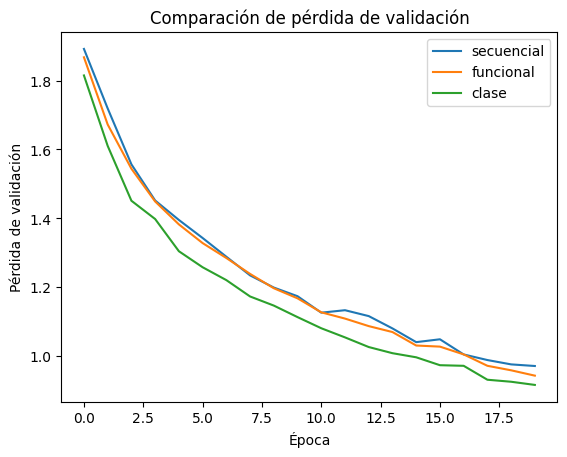

In [9]:
val_loss_df = pd.DataFrame({
    'secuencial': historia_secuencial['val_loss'],
    'funcional': historia_funcional['val_loss'],
    'clase': historia_clase['val_loss']
})

val_loss_df.plot()
plt.title('Comparación de pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida de validación')
plt.show()


A partir de la gráfica, se puede concluir que todos los modelos muestran una disminución constante en la pérdida de validación a medida que avanza el entrenamiento, lo que indica que están aprendiendo correctamente. Sin embargo, el modelo basado en clases (clase) tiene una pérdida de validación consistentemente menor en comparación con los otros dos modelos, sugiriendo que tiene un mejor rendimiento y generaliza mejor en los datos de validación. Los modelos secuencial y funcional presentan un rendimiento similar, aunque el modelo funcional parece tener una ligera ventaja sobre el secuencial.